In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.shape

(545, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.describe(include=["object"])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

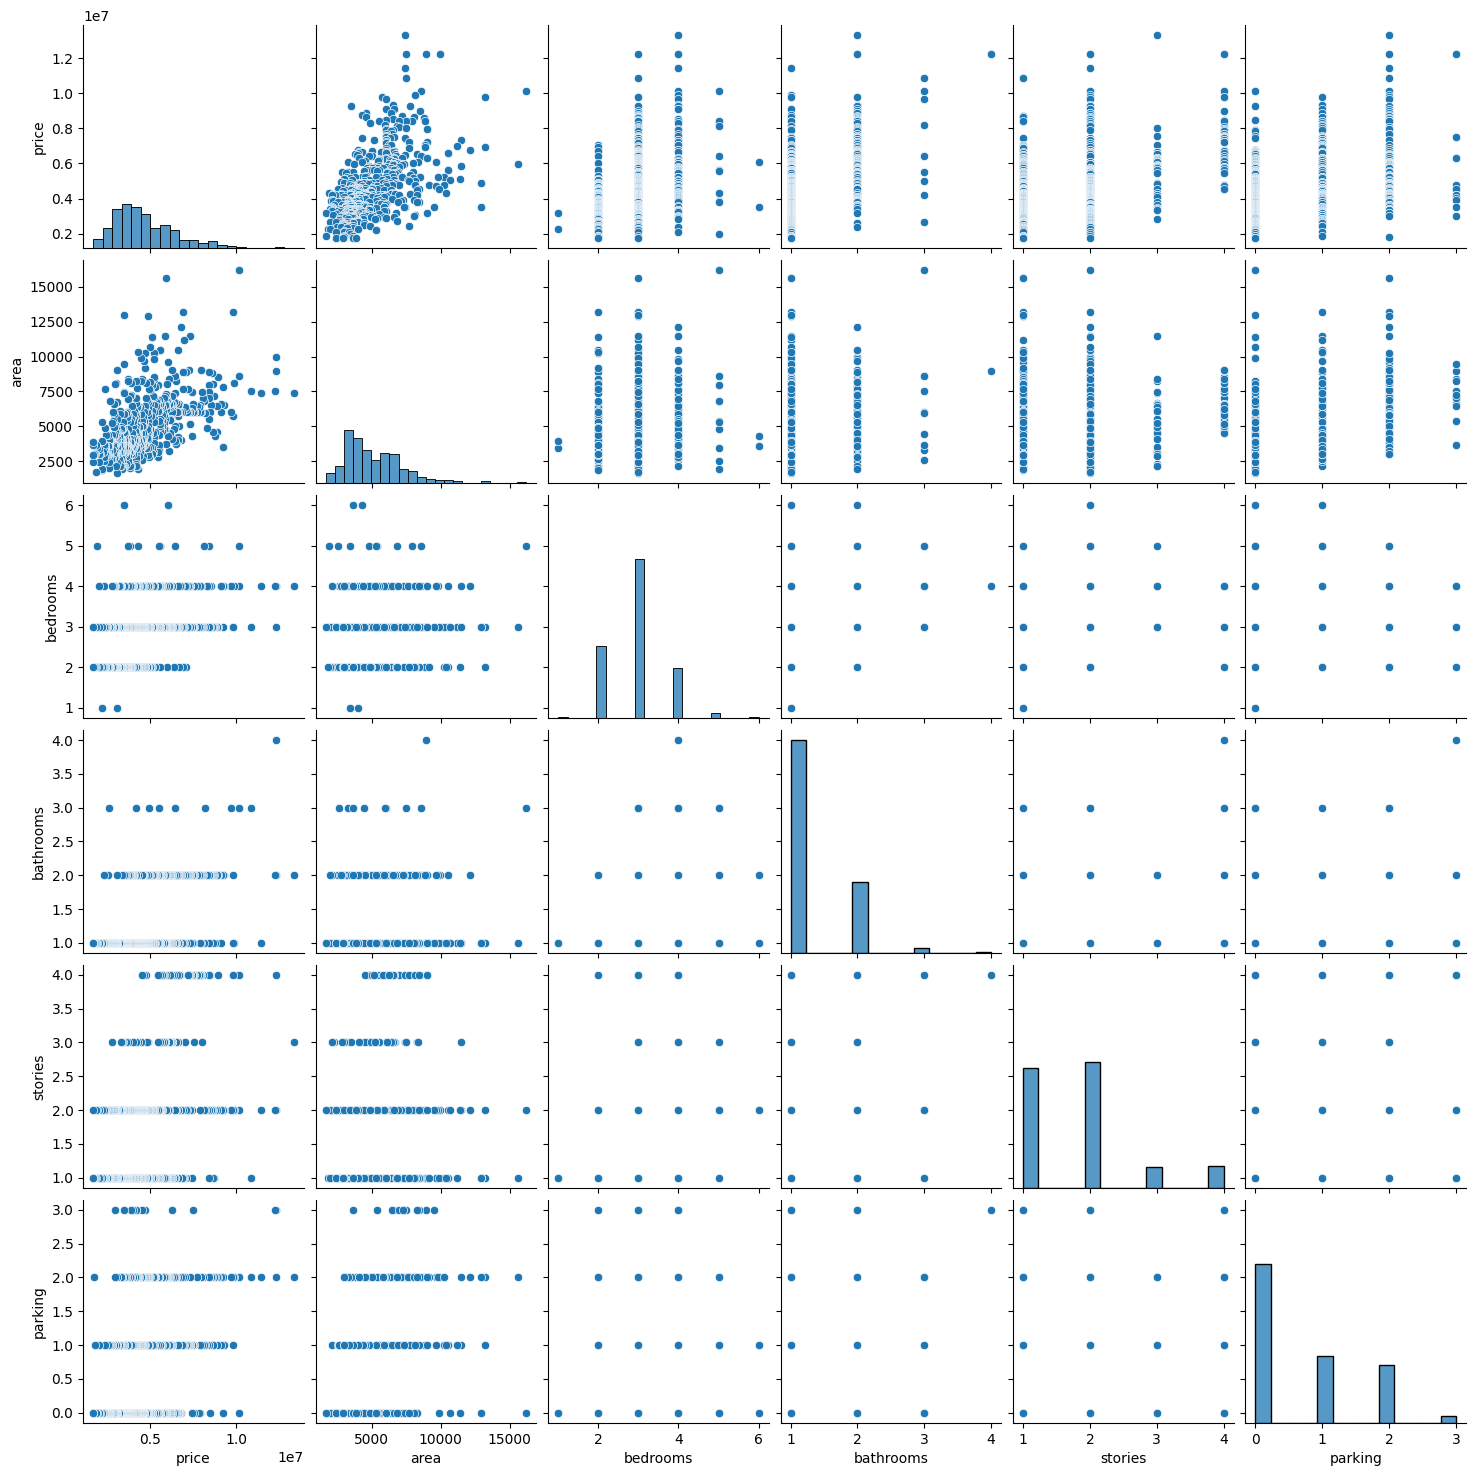

In [14]:
sns.pairplot(df)

<Axes: >

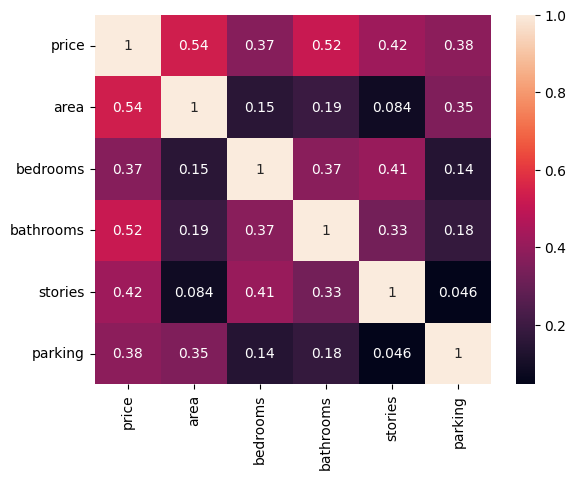

In [15]:
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix, annot=True)

In [16]:
df1 = df[['price', "area"]]

<Axes: >

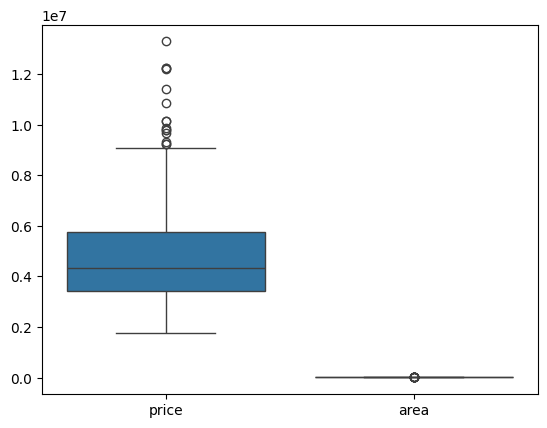

In [17]:
sns.boxplot(df1)

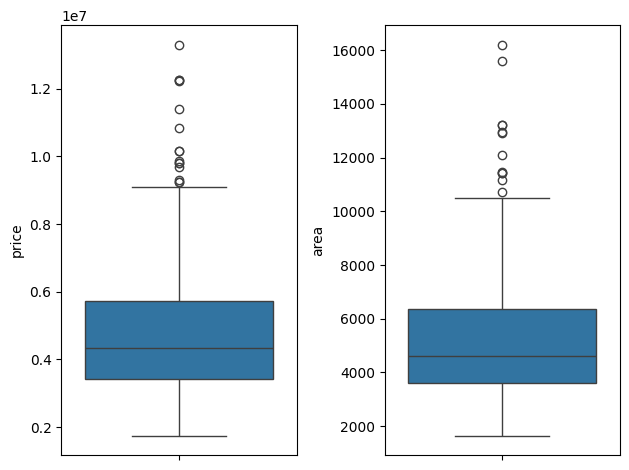

In [24]:
fig, axs = plt.subplots(1,2)
sns.boxplot(df1['price'], ax=axs[0])
sns.boxplot(df1['area'], ax=axs[1])
plt.tight_layout()
plt.show()

In [43]:
df_clean = df.copy()

In [44]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_clean = df_clean[((df_clean['price'] >= lb) & (df_clean['price'] <= ub))]

# df_clean.head()
print(df.shape, df_clean.shape)

(545, 13) (530, 13)


In [45]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_clean = df_clean[((df_clean['area'] >= lb) & (df_clean['area'] <= ub))]

# df_clean.head()
print(df.shape, df_clean.shape)

(545, 13) (520, 13)


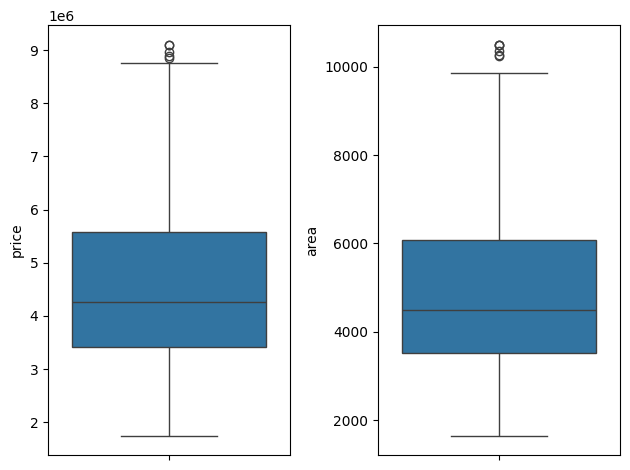

In [46]:
fig, axs = plt.subplots(1,2)
sns.boxplot(df_clean['price'], ax=axs[0])
sns.boxplot(df_clean['area'], ax=axs[1])
plt.tight_layout()
plt.show()

In [48]:
# independent & dependent variable
X = df_clean[['area']]
y = df_clean[['price']]

In [50]:
# split dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# feature scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  1723947596270.1467
Root Mean Squared Error:  1312991.8492778798


In [55]:
# Regression model coefficients and intercept
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [[444.04891358]]
Intercept:  [2370283.47703947]


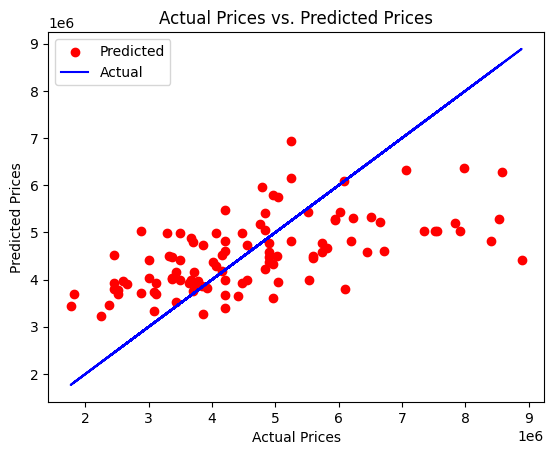

In [57]:
# Scatter plot of predicted prices
plt.scatter(y_test, y_pred, color='red', label='Predicted')

# Scatter plot of actual prices
plt.plot(y_test, y_test, color='blue', label='Actual')

plt.title("Actual Prices vs. Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

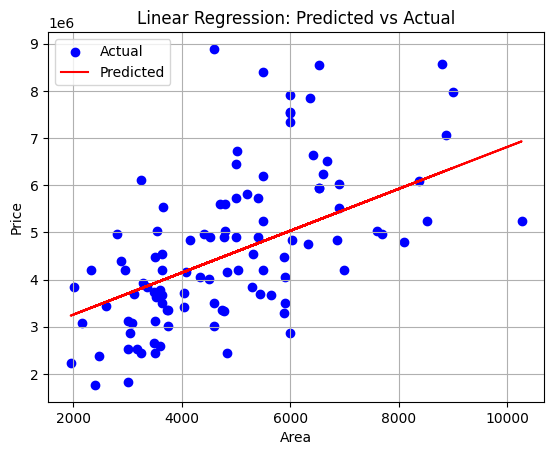

In [60]:
# Scatter plot of actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line (best-fit line)
plt.plot(X_test, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)

# Show plot
plt.show()